### K-Means Task

##### 은행 고객 마케팅
📌 마케팅에 성공한 고객을 대상으로 클러스터링을 진행한다.

- age: 나이
- job : 직업 종류 ('admin.','blue-collar','entrepreneur','housemaid','management','retired',  
'self-employed','services','student','technician','unemployed','unknown')
- marital: 결혼 여부 ('divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education: 교육 수준 ('basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: 연체 여부 ('no','yes','unknown')
- housing: 주택 대출 여부 ('no','yes','unknown')
- loan: 개인 대출 여부 ('no','yes','unknown')
- contact: 연락처 통신 유형('cellular','telephone')
- month: 지난 연락 월 ('jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: 지난 연락 요일 ('mon','tue','wed','thu','fri')
- poutcome: 이전 마케팅 캠페인의 결과('failure','nonexistent','success')

In [39]:
import pandas as pd

bank_df = pd.read_csv('./datasets/bank.csv')
bank_df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [40]:
bank_df.poutcome.value_counts()

poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64

In [41]:
columns = ['age', 'job', 'housing', 'marital', 'poutcome', 'campaign']
bank_df = bank_df[columns]
bank_df

,age,job,housing,marital,poutcome,campaign
0,56,housemaid,no,married,nonexistent,1
1,57,services,no,married,nonexistent,1
2,37,services,yes,married,nonexistent,1
3,40,admin.,no,married,nonexistent,1
4,56,services,no,married,nonexistent,1
...,...,...,...,...,...,...
41183,73,retired,yes,married,nonexistent,1
41184,46,blue-collar,no,married,nonexistent,1
41185,56,retired,yes,married,nonexistent,2
41186,44,technician,no,married,nonexistent,1


In [42]:
bank_df.isna().sum()

age         0
job         0
housing     0
marital     0
poutcome    0
campaign    0
dtype: int64

In [43]:
for column in bank_df.columns[bank_df.dtypes == 'object']:
    bank_df = bank_df[(bank_df[column] != 'unknown') & (bank_df[column] != 'nonexistent')]

bank_df = bank_df.reset_index(drop=True)

In [44]:
bank_df

,age,job,housing,marital,poutcome,campaign
0,38,blue-collar,yes,single,failure,1
1,40,services,yes,married,failure,1
2,36,admin.,yes,married,failure,1
3,36,admin.,yes,married,failure,1
4,37,admin.,yes,married,success,1
...,...,...,...,...,...,...
5426,62,retired,yes,married,success,1
5427,34,student,yes,single,failure,1
5428,62,retired,no,married,success,2
5429,29,unemployed,yes,single,success,1


In [45]:
success_df = bank_df[bank_df.poutcome == 'success']
success_df = success_df.reset_index(drop=True)
success_df = success_df.drop(columns='poutcome')
success_df

,age,job,housing,marital,campaign
0,37,admin.,yes,married,1
1,48,management,yes,married,1
2,42,technician,yes,married,1
3,50,entrepreneur,yes,married,1
4,36,self-employed,yes,single,2
...,...,...,...,...,...
1316,35,technician,yes,divorced,3
1317,54,admin.,no,married,2
1318,62,retired,yes,married,1
1319,62,retired,no,married,2


In [46]:
from sklearn.preprocessing import LabelEncoder
encoders = []
encoded_bank_df = success_df.copy()
for column in success_df.columns[success_df.dtypes == 'object']:
    encoder = LabelEncoder()
    encoded_bank_df[column] = encoder.fit_transform(success_df[column])
    encoders.append(encoder)
    print(encoder.classes_)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed']
['no' 'yes']
['divorced' 'married' 'single']


In [47]:
encoded_bank_df

,age,job,housing,marital,campaign
0,37,0,1,1,1
1,48,4,1,1,1
2,42,9,1,1,1
3,50,2,1,1,1
4,36,6,1,2,2
...,...,...,...,...,...
1316,35,9,1,0,3
1317,54,0,0,1,2
1318,62,5,1,1,1
1319,62,5,0,1,2


In [50]:
from sklearn.preprocessing import StandardScaler

scaled_bank_df = pd.DataFrame(StandardScaler().fit_transform(encoded_bank_df.iloc[:, :-1]), columns=encoded_bank_df.iloc[:, :-1].columns)
scaled_bank_df

,age,job,housing,marital
0,-0.327985,-1.125206,0.865834,-0.442197
1,0.387301,-0.036270,0.865834,-0.442197
2,-0.002855,1.324899,0.865834,-0.442197
3,0.517352,-0.580738,0.865834,-0.442197
4,-0.393011,0.508197,0.865834,1.153819
...,...,...,...,...
1316,-0.458037,1.324899,0.865834,-2.038213
1317,0.777456,-1.125206,-1.154956,-0.442197
1318,1.297663,0.235963,0.865834,-0.442197
1319,1.297663,0.235963,-1.154956,-0.442197


In [51]:
for column in scaled_bank_df.columns:
    scaled_bank_df = scaled_bank_df[scaled_bank_df[column].between(-1.96, 1.96)]

success_df = success_df.iloc[scaled_bank_df.index, :]
scaled_bank_df = scaled_bank_df.reset_index(drop=True)
success_df = success_df.reset_index(drop=True)
print(success_df.shape)
scaled_bank_df

(1146, 5)


,age,job,housing,marital
0,-0.327985,-1.125206,0.865834,-0.442197
1,0.387301,-0.036270,0.865834,-0.442197
2,-0.002855,1.324899,0.865834,-0.442197
3,0.517352,-0.580738,0.865834,-0.442197
4,-0.393011,0.508197,0.865834,1.153819
...,...,...,...,...
1141,1.167612,-0.852972,0.865834,-0.442197
1142,0.777456,-1.125206,-1.154956,-0.442197
1143,1.297663,0.235963,0.865834,-0.442197
1144,1.297663,0.235963,-1.154956,-0.442197


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

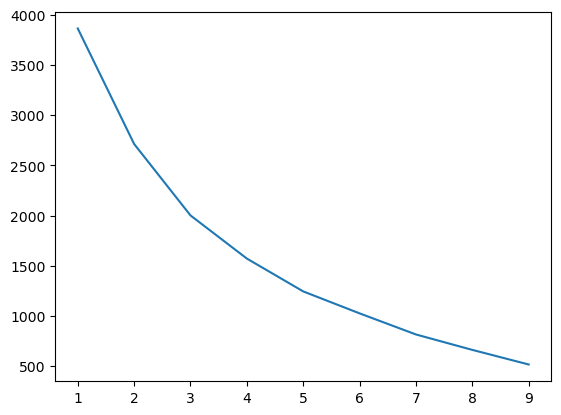

In [52]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# k 개수
x = []

# 응집도
y = []

for k in range(1, 10):
    k_means = KMeans(n_clusters=k, random_state=124)
    k_means.fit(scaled_bank_df)
    
    x.append(k)
    y.append(k_means.inertia_)
    
plt.plot(x, y)

In [53]:
k_means = KMeans(n_clusters=2, random_state=124)
k_means.fit_predict(scaled_bank_df)
scaled_bank_df['cluster'] = k_means.labels_
scaled_bank_df

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,age,job,housing,marital,cluster
0,-0.327985,-1.125206,0.865834,-0.442197,0
1,0.387301,-0.036270,0.865834,-0.442197,0
2,-0.002855,1.324899,0.865834,-0.442197,0
3,0.517352,-0.580738,0.865834,-0.442197,0
4,-0.393011,0.508197,0.865834,1.153819,0
...,...,...,...,...,...
1141,1.167612,-0.852972,0.865834,-0.442197,0
1142,0.777456,-1.125206,-1.154956,-0.442197,1
1143,1.297663,0.235963,0.865834,-0.442197,0
1144,1.297663,0.235963,-1.154956,-0.442197,1


In [54]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_df = pca.fit_transform(scaled_bank_df.iloc[:, :-1])

print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.35821676 0.29120725]
0.6494240138400192


In [55]:
pca_columns=[f'pca{i+1}' for i in range(2)]
pca_df = pd.DataFrame(pca_df, columns=pca_columns)
pca_df.head(10)

,pca1,pca2
0,0.785046,-1.145634
1,0.329419,-1.011978
2,-0.846854,-0.676224
3,0.787640,-1.142863
4,-1.083246,-0.564357
5,1.009143,0.890193
6,1.791231,0.671014
7,0.598626,-1.042422
8,-0.244904,-0.806161
9,-0.119751,1.214521


In [56]:
pca_df['cluster'] = scaled_bank_df.cluster
pca_df

,pca1,pca2,cluster
0,0.785046,-1.145634,0
1,0.329419,-1.011978,0
2,-0.846854,-0.676224,0
3,0.787640,-1.142863,0
4,-1.083246,-0.564357,0
...,...,...,...
1141,1.293239,-1.285174,0
1142,1.883394,0.645391,1
1143,0.561123,-1.074649,0
1144,1.137215,0.861572,1


<Axes: xlabel='pca1', ylabel='pca2'>

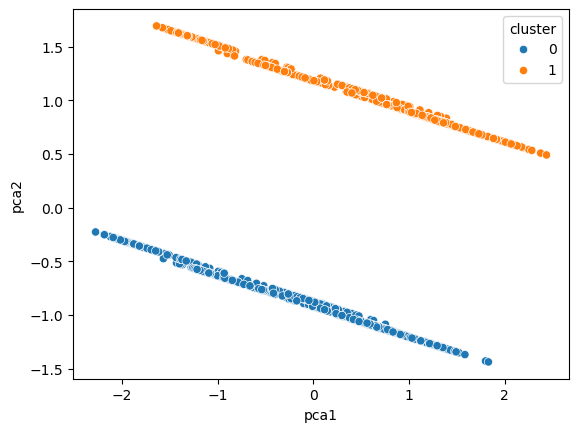

In [57]:
import seaborn as sns
centroids = k_means.cluster_centers_

# centroids_x = centroids[:, 0]
# centroids_y = centroids[:, 1]

sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=pca_df)
# sns.scatterplot(x=centroids_x, y=centroids_y, c='red')

In [58]:
success_df.loc[:, 'cluster'] = pca_df.cluster
success_df

,age,job,housing,marital,campaign,cluster
0,37,admin.,yes,married,1,0
1,48,management,yes,married,1,0
2,42,technician,yes,married,1,0
3,50,entrepreneur,yes,married,1,0
4,36,self-employed,yes,single,2,0
...,...,...,...,...,...,...
1141,60,blue-collar,yes,married,2,0
1142,54,admin.,no,married,2,1
1143,62,retired,yes,married,1,0
1144,62,retired,no,married,2,1


In [59]:
success_df.cluster.value_counts()

cluster
0    655
1    491
Name: count, dtype: int64

<Axes: xlabel='campaign', ylabel='Count'>

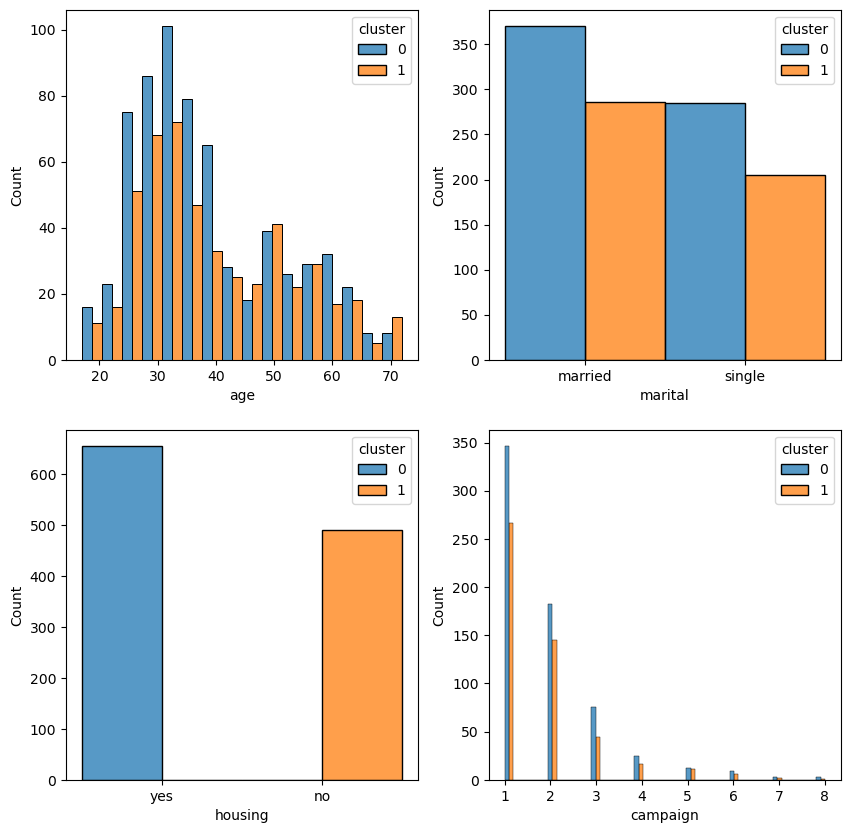

In [60]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2, figsize=(10, 10))

sns.histplot(x='age', hue='cluster', data=success_df, multiple='dodge', ax=ax[0, 0])
sns.histplot(x='marital', hue='cluster', data=success_df, multiple='dodge', ax=ax[0, 1])
sns.histplot(x='housing', hue='cluster', data=success_df, multiple='dodge', ax=ax[1, 0])
sns.histplot(x='campaign', hue='cluster', data=success_df, multiple='dodge', ax=ax[1, 1])

In [61]:
success_df

,age,job,housing,marital,campaign,cluster
0,37,admin.,yes,married,1,0
1,48,management,yes,married,1,0
2,42,technician,yes,married,1,0
3,50,entrepreneur,yes,married,1,0
4,36,self-employed,yes,single,2,0
...,...,...,...,...,...,...
1141,60,blue-collar,yes,married,2,0
1142,54,admin.,no,married,2,1
1143,62,retired,yes,married,1,0
1144,62,retired,no,married,2,1


In [67]:
cluster_0_df = success_df[success_df.cluster == 0]
cluster_1_df = success_df[success_df.cluster == 1]
success_df.cluster.value_counts()

cluster
0    655
1    491
Name: count, dtype: int64

In [65]:
print(cluster_0_df.campaign.value_counts())
print(cluster_1_df.campaign.value_counts())

# 612번 성공 중에 0번 그룹이 80번 더 성공했다.

campaign
1    346
2    182
3     75
4     25
5     12
6      9
8      3
7      3
Name: count, dtype: int64
campaign
1    266
2    145
3     44
4     16
5     11
6      6
7      2
8      1
Name: count, dtype: int64


In [71]:
cluster_0_df.campaign.value_counts()[1]

346

In [69]:
cluster_0_df.cluster.shape[0]

655

In [73]:
print(cluster_0_df.campaign.value_counts()[1] / cluster_0_df.cluster.shape[0])
print(cluster_1_df.campaign.value_counts()[1] / cluster_1_df.cluster.shape[0])

0.5282442748091603
0.5417515274949084


In [76]:
test_df = pd.DataFrame({'id': [1], 'name': ['a']})
test_df

,id,name
0,1,a


In [77]:


campaign_list = []
cluster_0_list = []
cluster_1_list = []

for i in range(1, 9):
    campaign_list.append(i)
    cluster_0_list.append(cluster_0_df.campaign.value_counts()[i] / cluster_0_df.cluster.shape[0])
    cluster_1_list.append(cluster_1_df.campaign.value_counts()[i] / cluster_1_df.cluster.shape[0])

result_df = pd.DataFrame({'campaign': campaign_list, 'cluster_0': cluster_0_list, 'cluster_1': cluster_1_list})
result_df

,campaign,cluster_0,cluster_1
0,1,0.528244,0.541752
1,2,0.277863,0.295316
2,3,0.114504,0.089613
3,4,0.038168,0.032587
4,5,0.018321,0.022403
5,6,0.013740,0.012220
6,7,0.004580,0.004073
7,8,0.004580,0.002037


##### 🚩 결론: 1번, 2번, 5번 캠페인은 대출이 없는 고객에게 추천하고, 나머지 캠페인은 대출이 있는 고객에게 추천하는 것이 좋다.